In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothicCoding')
sns.set(font='NanumGothicCoding')

# 1. 분석 주제 및 목적
- 최근 NBA에서는 예전처럼 피지컬 싸움이나 골밑 싸움 대신 서로 3점슛만 던져대는 ‘양궁 농구’로 인해 보는 재미가 떨어졌다는 의견이 종종 보임
- 이런 원인으로 골든 스테이트 워리어스와 스테판 커리가 3점 위주 전략으로 좋은 성적을 보였고 모든 팀들이 그를 따라가려해서 그렇다는 의견도 존재
- 그렇다면 과연 정말 스테판 커리와 골든 스테이트 워리어스의 선전으로 모든 팀들이 이런 농구를 하는 것일까?
- 아니면 3점이 늘어가던 흐름에서 그에 특화된 팀과 선수가 좋은 성적을 보인것인가가 궁금해짐

In [3]:
stats = pd.read_csv('NBA_Stats.csv')

In [4]:
stats = stats.sort_values('Season')

In [5]:
stats.describe()

,W,L,WIN%,Min,PTS,FGM,FGA,FG%,3PM,3PA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,40.025469,40.025469,0.499798,48.344236,102.837399,38.230831,83.770241,45.617292,8.380697,23.418365,...,31.868499,42.824263,22.701072,14.362735,7.604692,4.896649,4.896649,20.652279,16.377748,-0.004826
std,12.209827,12.133182,0.149269,0.178511,7.920768,2.702331,4.223192,1.702397,3.237462,8.723039,...,2.202229,2.071530,2.509295,1.159197,0.844480,0.787249,0.696223,1.743591,8.170932,4.607062
min,7.000000,9.000000,0.106000,48.000000,84.200000,32.400000,74.300000,40.800000,2.600000,7.800000,...,26.900000,36.900000,17.400000,11.100000,5.500000,2.400000,3.000000,15.600000,0.000000,-13.900000
25%,31.250000,31.000000,0.390000,48.200000,96.800000,36.200000,80.525000,44.400000,5.800000,16.400000,...,30.100000,41.400000,20.900000,13.600000,7.000000,4.325000,4.400000,19.400000,18.300000,-3.100000
50%,41.000000,39.000000,0.512000,48.300000,101.600000,37.900000,83.500000,45.600000,7.700000,21.350000,...,31.800000,42.800000,22.400000,14.400000,7.600000,4.900000,4.900000,20.600000,19.800000,0.250000
75%,49.000000,49.000000,0.610000,48.475000,109.475000,40.275000,87.075000,46.800000,11.000000,31.200000,...,33.500000,44.200000,24.300000,15.100000,8.200000,5.400000,5.300000,21.800000,20.900000,3.300000
max,73.000000,72.000000,0.890000,49.000000,123.300000,47.000000,94.400000,50.700000,17.800000,48.200000,...,42.200000,51.700000,30.900000,18.500000,10.500000,8.200000,6.900000,26.700000,25.700000,12.900000


# 2. 결과

### 주요 사항

- 00-01 시즌부터 24-25 시즌까지 25년간의 데이터 수집
- 전체 데이터에서 야투와 3점 관련 스탯이 어떻게 변화하는지 관찰

### 배경 설명

- 골든 스테이트 워리어스 14-15 시즌 스테판 커리 데뷔 이후 첫 NBA 우승
- 골든 스테이트 워리어스 15-16 시즌 73승 9패 역대 NBA 최고 승률 달성(결승전 패배로 우승은 실패)
- 골든 스테이트 워리어스 16-17 ~ 17-18 시즌 2년 연속 NBA 우승
- 골든 스테이트 워리어스 21-22 NBA 우승
- 스테판 커리 2009년 데뷔
- 스테판 커리 NBA 역사상 최고의 3점 슈터
- 스테판 커리 NBA 역대 최다 3점, 역대 최장 경기 연속 3점
- 당시 골든 스테이트 워리어스는 역사상 최고의 3점 슈터 스테판 커리, 커리만큼은 아니더라도 역시 3점 스페셜리스트인 클레이 탐슨을 위주로 3점 플레이를 선호했었음
- 참고로 2019년 NBA 역사상 최고의 슈터 1위로 커리, 2위로 탐슨이 선정

In [6]:
season_stats = pd.DataFrame({'시즌 별 평균 3점 성공률':stats.groupby(by=['Season'])['3P%'].mean(), '시즌 별 평균 3점 성공 횟수':stats.groupby(['Season'])['3PM'].mean(), '시즌 별 평균 3점 시도 횟수': stats.groupby(by=['Season'])['3PA'].mean(),
                            '시즌 별 평균 야투 성공률':stats.groupby(by=['Season'])['FG%'].mean(), '시즌 별 평균 야투 성공 횟수':stats.groupby(['Season'])['FGM'].mean(), '시즌 별 평균 야투 시도 횟수': stats.groupby(by=['Season'])['FGA'].mean() })

In [7]:
season_stats

,시즌 별 평균 3점 성공률,시즌 별 평균 3점 성공 횟수,시즌 별 평균 3점 시도 횟수,시즌 별 평균 야투 성공률,시즌 별 평균 야투 성공 횟수,시즌 별 평균 야투 시도 횟수
Season,,,,,,
00-01,35.182759,4.841379,13.706897,44.286207,35.682759,80.603448
01-02,35.175862,5.213793,14.755172,44.506897,36.172414,81.265517
02-03,34.662069,5.134483,14.675862,44.203448,35.710345,80.782759
03-04,34.555172,5.182759,14.920690,43.848276,35.006897,79.817241
04-05,35.316667,5.600000,15.750000,44.743333,35.943333,80.336667
05-06,35.686667,5.726667,15.983333,45.373333,35.836667,78.990000
06-07,35.680000,6.070000,16.940000,45.833333,36.526667,79.710000
07-08,36.023333,6.563333,18.106667,45.716667,37.260000,81.510000
08-09,36.543333,6.653333,18.133333,45.886667,37.113333,80.916667


Text(0.5, 1.0, '시즌 별 평균 3점 성공률 그래프')

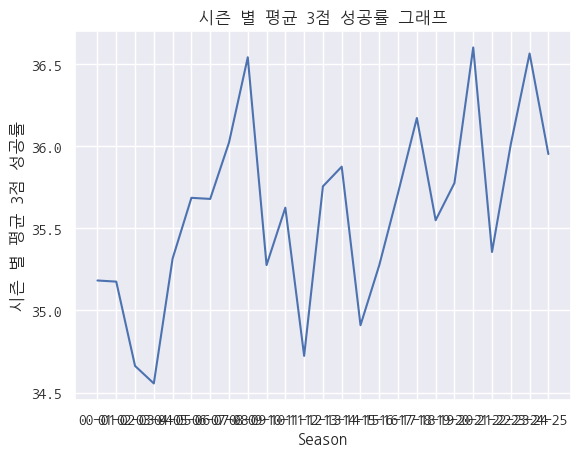

In [8]:
sns.lineplot(season_stats['시즌 별 평균 3점 성공률']).set_title("시즌 별 평균 3점 성공률 그래프")

Text(0.5, 1.0, '시즌 별 평균 3점 성공 횟수 그래프')

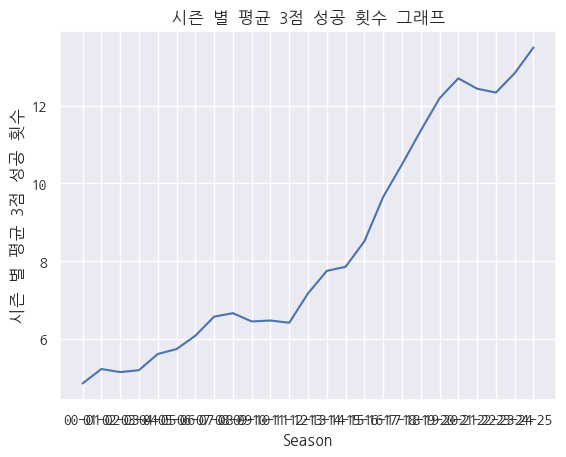

In [9]:
sns.lineplot(season_stats['시즌 별 평균 3점 성공 횟수']).set_title("시즌 별 평균 3점 성공 횟수 그래프")

Text(0.5, 1.0, '시즌 별 평균 3점 시도 횟수 그래프')

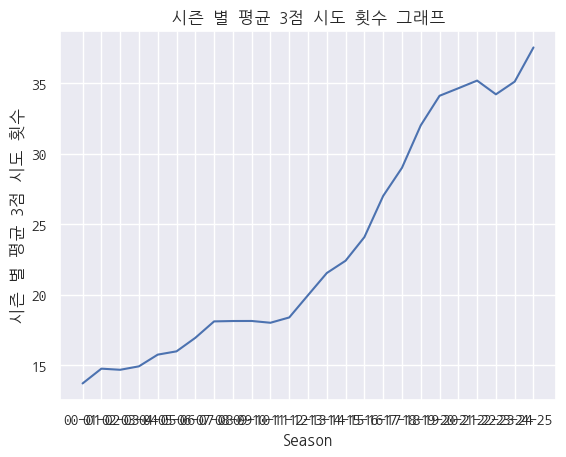

In [10]:
sns.lineplot(season_stats['시즌 별 평균 3점 시도 횟수']).set_title("시즌 별 평균 3점 시도 횟수 그래프")

Text(0.5, 1.0, '시즌 별 평균 야투 성공 횟수 그래프')

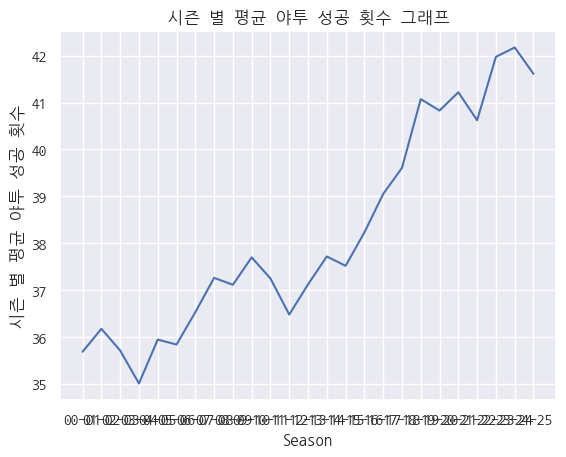

In [11]:
sns.lineplot(season_stats['시즌 별 평균 야투 성공 횟수']).set_title("시즌 별 평균 야투 성공 횟수 그래프")

Text(0.5, 1.0, '시즌 별 평균 야투 시도 횟수 그래프')

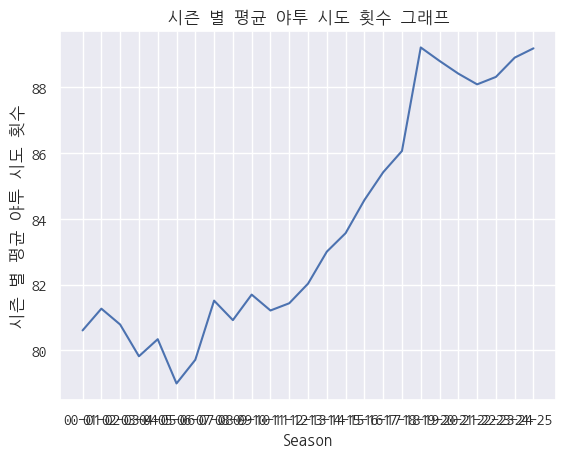

In [12]:
sns.lineplot(season_stats['시즌 별 평균 야투 시도 횟수']).set_title("시즌 별 평균 야투 시도 횟수 그래프")

### 전체 야투에서 3점의 비율 대폭 증가

- 평균 야투 성공 횟수에서 3점 비율
    - 평균 야투 성공 횟수는 00-01 시즌 **35.6회**에서 23-24 시즌 **42.1회**로 6.5회 증가
    - 평균 3점 성공 횟수는 00-01 시즌 **4.8회**에서 23-24 시즌 **13.5회**로 8.7회 증가
    - 00-01 시즌 야투 성공 중 3점 비율 **13.4**%에서 23-24 시즌 **32**%로 약 2.5배 증가
- 평균 야투 시도 횟수에서 3점 비율
    - 평균 야투 시도 횟수는 00-01 시즌 **80.6회**에서 24-25 시즌 **88.9회**로 8.3회 증가
    - 평균 3점 시도 횟수는 00-01 시즌 **13.7회**에서 24-25 시즌 **37.5회**로 8.7회 증가
    - 00-01 시즌 야투 시도 중 3점 비율 **16.9**%에서 24-25 시즌 **42.1**%로 약 2.5배 증가

In [13]:
stats[stats['Team'] == 'GoldenStateWarriors'][['Season','3PM','3PA','3P%']]

,Season,3PM,3PA,3P%
744,00-01,3.4,11.8,29.3
716,01-02,3.9,12.1,32.2
677,02-03,5.2,15.1,34.4
647,03-04,5.2,15.6,33.4
620,04-05,7.6,21.6,35.2
591,05-06,7.6,22.3,34.1
551,06-07,8.5,24.0,35.6
521,07-08,9.3,26.6,34.8
503,08-09,6.7,18.0,37.3
475,09-10,7.7,20.6,37.5


In [14]:
team_stats = pd.DataFrame({ 'GSW 시즌 별 평균 3점 성공률':stats[stats['Team']=='GoldenStateWarriors'].groupby(by=['Season'])['3P%'].mean(), 'GSW 시즌 별 평균 3점 성공 횟수':stats[stats['Team']=='GoldenStateWarriors'].groupby(['Season'])['3PM'].mean(), 'GSW 시즌 별 평균 3점 시도 횟수': stats[stats['Team']=='GoldenStateWarriors'].groupby(by=['Season'])['3PA'].mean(),
    'GSW 제외 시즌 별 평균 3점 성공률':stats[stats['Team']!='GoldenStateWarriors'].groupby(by=['Season'])['3P%'].mean(), 'GSW 제외 시즌 별 평균 3점 성공 횟수':stats[stats['Team']!='GoldenStateWarriors'].groupby(['Season'])['3PM'].mean(), 'GSW 제외 시즌 별 평균 3점 시도 횟수': stats[stats['Team']!='GoldenStateWarriors'].groupby(by=['Season'])['3PA'].mean() })

In [15]:
team_stats

,GSW 시즌 별 평균 3점 성공률,GSW 시즌 별 평균 3점 성공 횟수,GSW 시즌 별 평균 3점 시도 횟수,GSW 제외 시즌 별 평균 3점 성공률,GSW 제외 시즌 별 평균 3점 성공 횟수,GSW 제외 시즌 별 평균 3점 시도 횟수
Season,,,,,,
00-01,29.3,3.4,11.8,35.392857,4.892857,13.775000
01-02,32.2,3.9,12.1,35.282143,5.260714,14.850000
02-03,34.4,5.2,15.1,34.671429,5.132143,14.660714
03-04,33.4,5.2,15.6,34.596429,5.182143,14.896429
04-05,35.2,7.6,21.6,35.320690,5.531034,15.548276
05-06,34.1,7.6,22.3,35.741379,5.662069,15.765517
06-07,35.6,8.5,24.0,35.682759,5.986207,16.696552
07-08,34.8,9.3,26.6,36.065517,6.468966,17.813793
08-09,37.3,6.7,18.0,36.517241,6.651724,18.137931


Text(0.5, 1.0, '워리어스 & 워리어스 이외 팀 시즌 별 평균 3점 성공률 그래프')

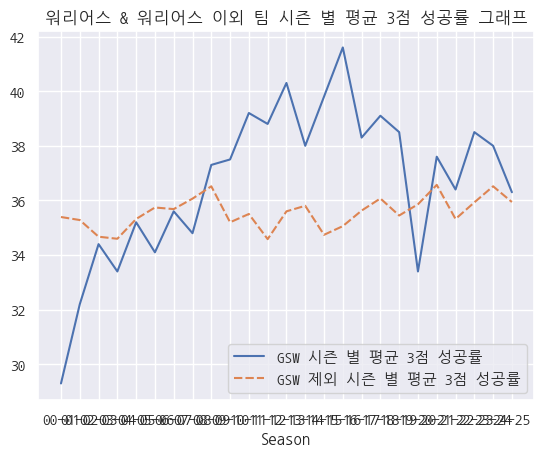

In [25]:
sns.lineplot(team_stats[['GSW 시즌 별 평균 3점 성공률','GSW 제외 시즌 별 평균 3점 성공률']]).set_title("워리어스 & 워리어스 이외 팀 시즌 별 평균 3점 성공률 그래프")

Text(0.5, 1.0, '워리어스 & 워리어스 이외 팀 시즌 별 평균 3점 성공 횟수 그래프')

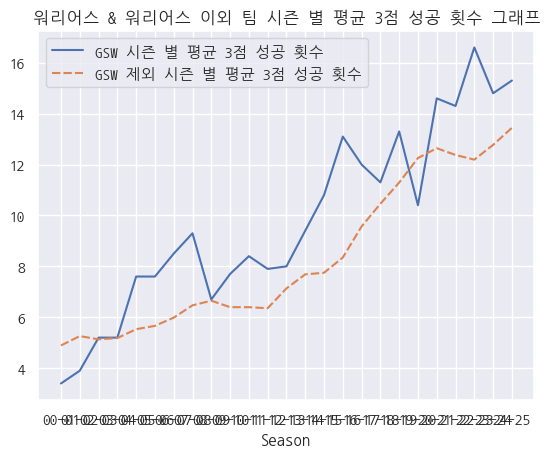

In [22]:
sns.lineplot(team_stats[['GSW 시즌 별 평균 3점 성공 횟수','GSW 제외 시즌 별 평균 3점 성공 횟수']]).set_title("워리어스 & 워리어스 이외 팀 시즌 별 평균 3점 성공 횟수 그래프")

Text(0.5, 1.0, '워리어스 & 워리어스 이외 팀 시즌 별 평균 3점 시도 횟수 그래프')

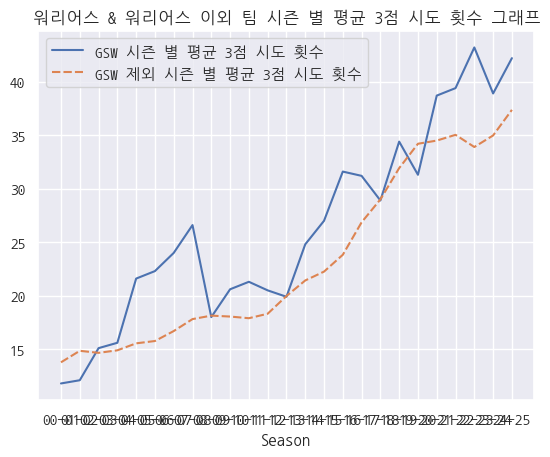

In [23]:
sns.lineplot(team_stats[['GSW 시즌 별 평균 3점 시도 횟수','GSW 제외 시즌 별 평균 3점 시도 횟수']]).set_title("워리어스 & 워리어스 이외 팀 시즌 별 평균 3점 시도 횟수 그래프")

### 골든 스테이트 워리어스 vs 이외 팀
- 16-17 시즌 부터 워리어스 이외의 팀들의 평균 3점 시도 횟수 급증
- 워리어스는 거의 항상 평균 이상의 3점 스탯을 가지고 있음
- 확실히 워리어스가 3점 위주 플레이를 선도하는 것 같음
- 하지만 이전에도 꾸준히 3점 위주 스탯은 꾸준히 증가하고 있었음

### 결론
- 참고로 저는 농알못이므로 그냥 재미로만 봐야합니다
- 실제로 NBA는 3점 농구가 되어가고 있었다… 그것도 엄청나게…
    - 3점 관련 스탯(시도 횟수, 성공 횟수) 대폭 증가
    - 또한 3점 성공률도 24년간 약 2% 가까이 높아졌다. 3점 스페셜리스트들의 등장도 영향이 있겠지만 전체적으로 3점 성공률이 올랐음
- 3점 시도 횟수가 늘어나며 자연스레 2점 시도 횟수 감소
    - 애초에 상대 구역에 진입조차하지 않고 3점 시도
- 3점 관련 스탯은 원래부터 꾸준히 늘고 있는 상태였으나 16-17시즌 부터 가파르게 증가
    - 14-15시즌부터가 골든 스테이트 워리어스 왕조가 이루어져 가던 시기
- 시대의 흐름과 그에 맞는 팀과 선수의 등장, 그리고 거기에 발 맞춰가는 팀들
    - 시대의 흐름(룰의 변화, 전술의 발전 등)과 골든 스테이트 워리어스 둘 모두의 영향이 있는 것 같음
    - 3점 슛은 성공만 할 수 있다면 2점에 비해 이득(18-19 시즌 미드레인지 슛의 성공률이 약 40%라고 함, 따라서 3점 슛의 성공률이 27%라면 미드레인지 슛과 기대값과 비슷)
    - 위에서 성공률이 27%면 미드 레인지 슛과 기대값이 동일하다고 했는데 이제 약 36%로 훨씬 뛰어넘음
    - 미드 레인지 슛의 기대점수가 0.8(2\*0.4)점인데 반해 3점 슛의 기대점수는 1.08(3\*0.36)
    - 심지어 2010년대를 지나오며 3점 슛 스페셜리스트들은 40% 가까운 성공률을 보임(참고로 15-16시즌 커리의 3점 성공률은 45%…)
    - 이 와중에 골든 스테이트 워리어스가 3점 위주의 전략으로 좋은 모습을 보임
    - 다른 팀들도 워리어스를 벤치 마킹하며 지금의 흐름이 탄생